# Perceptron Neural Network

## Introduction

The **perceptron** is the fundamental building block of artificial neural networks, introduced by Frank Rosenblatt in 1958. It represents a simplified model of a biological neuron and serves as a binary linear classifier.

## Mathematical Foundation

### The Perceptron Model

A perceptron takes a vector of inputs $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ and produces a binary output. The computation proceeds in two stages:

**1. Weighted Sum (Net Input):**

$$z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w}^T \mathbf{x} + b$$

where:
- $\mathbf{w} = (w_1, w_2, \ldots, w_n)$ are the synaptic weights
- $b$ is the bias term (threshold)

**2. Activation Function (Heaviside Step):**

$$\hat{y} = \phi(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$

### Learning Algorithm

The perceptron learns through an iterative weight update rule. For each training sample $(\mathbf{x}^{(i)}, y^{(i)})$:

$$w_j \leftarrow w_j + \eta \cdot (y^{(i)} - \hat{y}^{(i)}) \cdot x_j^{(i)}$$

$$b \leftarrow b + \eta \cdot (y^{(i)} - \hat{y}^{(i)})$$

where $\eta$ is the learning rate (typically $0 < \eta \leq 1$).

### Convergence Theorem

**Perceptron Convergence Theorem:** If the training data is linearly separable, the perceptron learning algorithm will converge to a solution in a finite number of steps.

The decision boundary is a hyperplane defined by:

$$\mathbf{w}^T \mathbf{x} + b = 0$$

In 2D, this simplifies to the line:

$$w_1 x_1 + w_2 x_2 + b = 0$$

### Geometric Interpretation

The weight vector $\mathbf{w}$ is perpendicular to the decision boundary, and the bias $b$ controls the offset from the origin. Points on one side of the hyperplane are classified as class 1, while points on the other side are classified as class 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Perceptron Implementation

We implement a Perceptron class with methods for training and prediction.

In [2]:
class Perceptron:
    """Single-layer Perceptron classifier."""
    
    def __init__(self, learning_rate=0.1, n_iterations=100):
        """
        Initialize the Perceptron.
        
        Parameters
        ----------
        learning_rate : float
            Learning rate (between 0.0 and 1.0)
        n_iterations : int
            Number of passes over the training dataset
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_per_epoch = []
        
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values (0 or 1)
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.errors_per_epoch = []
        
        for epoch in range(self.n_iterations):
            errors = 0
            for xi, yi in zip(X, y):
                # Compute prediction
                prediction = self.predict_single(xi)
                
                # Calculate error
                error = yi - prediction
                
                # Update weights and bias
                update = self.learning_rate * error
                self.weights += update * xi
                self.bias += update
                
                # Count misclassifications
                errors += int(error != 0)
            
            self.errors_per_epoch.append(errors)
            
            # Early stopping if no errors
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs")
                break
        
        return self
    
    def net_input(self, X):
        """Calculate net input z = w^T * x + b"""
        return np.dot(X, self.weights) + self.bias
    
    def predict_single(self, x):
        """Return class label for a single sample"""
        return 1 if self.net_input(x) >= 0 else 0
    
    def predict(self, X):
        """Return class label for samples in X"""
        return np.where(self.net_input(X) >= 0, 1, 0)

## Generate Linearly Separable Dataset

We create a synthetic dataset with two classes that are linearly separable. This demonstrates the perceptron's ability to find a decision boundary.

In [3]:
def generate_linearly_separable_data(n_samples=100, noise=0.1):
    """
    Generate linearly separable 2D data.
    
    Parameters
    ----------
    n_samples : int
        Number of samples per class
    noise : float
        Standard deviation of Gaussian noise
    
    Returns
    -------
    X : ndarray
        Feature matrix
    y : ndarray
        Class labels
    """
    # Class 0: centered at (-1.5, -1.5)
    X0 = np.random.randn(n_samples, 2) * noise + np.array([-1.5, -1.5])
    
    # Class 1: centered at (1.5, 1.5)
    X1 = np.random.randn(n_samples, 2) * noise + np.array([1.5, 1.5])
    
    # Combine data
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])
    
    return X, y

# Generate dataset
X, y = generate_linearly_separable_data(n_samples=50, noise=0.5)

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y.astype(int))}")

Dataset shape: (100, 2)
Class distribution: [50 50]


## Train the Perceptron

In [4]:
# Create and train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=50)
perceptron.fit(X, y)

# Display learned parameters
print(f"\nLearned weights: w = [{perceptron.weights[0]:.4f}, {perceptron.weights[1]:.4f}]")
print(f"Learned bias: b = {perceptron.bias:.4f}")

# Calculate accuracy
predictions = perceptron.predict(X)
accuracy = np.mean(predictions == y) * 100
print(f"Training accuracy: {accuracy:.1f}%")

Converged after 2 epochs

Learned weights: w = [0.1252, 0.1569]
Learned bias: b = -0.1000
Training accuracy: 100.0%


## Visualization

We create a comprehensive visualization showing:
1. The decision boundary learned by the perceptron
2. The convergence of errors over epochs
3. The geometric interpretation of the classification

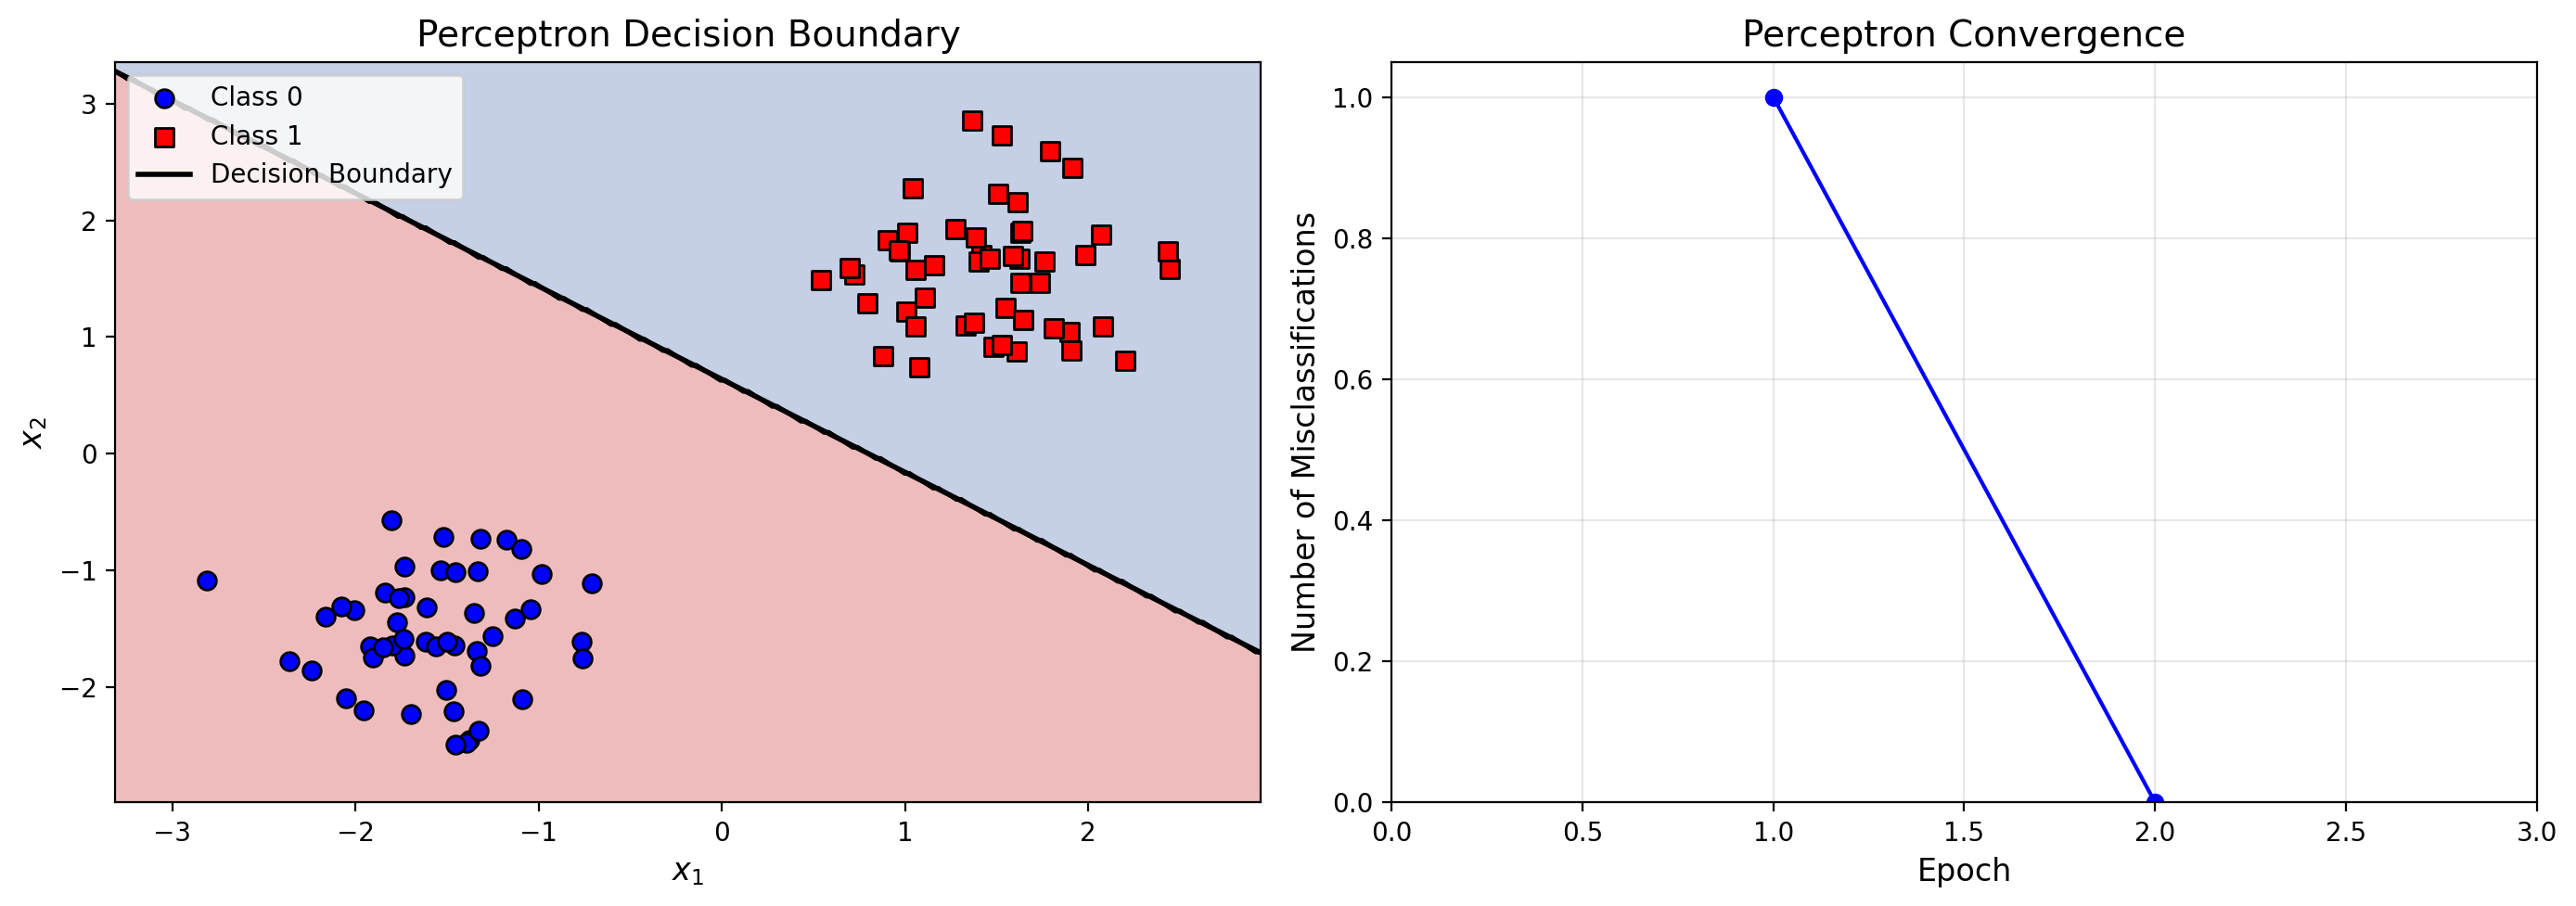


Visualization saved to 'plot.png'


In [5]:
def plot_decision_boundary(X, y, perceptron, ax):
    """
    Plot the decision boundary and data points.
    """
    # Define plot boundaries
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict on mesh
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot data points
    scatter0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], 
                          c='blue', marker='o', s=50, 
                          edgecolors='k', label='Class 0')
    scatter1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], 
                          c='red', marker='s', s=50, 
                          edgecolors='k', label='Class 1')
    
    # Plot decision boundary line
    if perceptron.weights[1] != 0:
        x_boundary = np.linspace(x_min, x_max, 100)
        y_boundary = -(perceptron.weights[0] * x_boundary + perceptron.bias) / perceptron.weights[1]
        ax.plot(x_boundary, y_boundary, 'k-', linewidth=2, label='Decision Boundary')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('$x_1$', fontsize=12)
    ax.set_ylabel('$x_2$', fontsize=12)
    ax.legend(loc='upper left')
    ax.set_title('Perceptron Decision Boundary', fontsize=14)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Decision boundary
plot_decision_boundary(X, y, perceptron, axes[0])

# Plot 2: Error convergence
epochs = range(1, len(perceptron.errors_per_epoch) + 1)
axes[1].plot(epochs, perceptron.errors_per_epoch, 'b-o', markersize=6)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Number of Misclassifications', fontsize=12)
axes[1].set_title('Perceptron Convergence', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, len(perceptron.errors_per_epoch) + 1)
axes[1].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('perceptron_neural_network_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Demonstrating the XOR Problem

A fundamental limitation of the single-layer perceptron is its inability to solve non-linearly separable problems. The classic example is the XOR (exclusive or) function.

The XOR truth table:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 0   |
| 0     | 1     | 1   |
| 1     | 0     | 1   |
| 1     | 1     | 0   |

No single hyperplane can separate the classes $(0,0), (1,1)$ from $(0,1), (1,0)$.

In [6]:
# XOR problem
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Train perceptron on XOR
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_xor.fit(X_xor, y_xor)

# Check predictions
predictions_xor = perceptron_xor.predict(X_xor)
accuracy_xor = np.mean(predictions_xor == y_xor) * 100

print("XOR Problem Results:")
print(f"Predictions: {predictions_xor}")
print(f"True labels: {y_xor}")
print(f"Accuracy: {accuracy_xor:.1f}%")
print(f"\nThe perceptron fails to solve XOR because it is not linearly separable.")
print(f"Final errors per epoch: {perceptron_xor.errors_per_epoch[-5:]}")

XOR Problem Results:
Predictions: [1 1 0 0]
True labels: [0 1 1 0]
Accuracy: 50.0%

The perceptron fails to solve XOR because it is not linearly separable.
Final errors per epoch: [4, 4, 4, 4, 4]


## Conclusion

The perceptron represents a foundational concept in neural networks and machine learning:

**Key Takeaways:**

1. **Linear Classification**: The perceptron finds a hyperplane that separates two classes

2. **Convergence Guarantee**: For linearly separable data, the algorithm is guaranteed to converge

3. **Limitations**: Cannot solve non-linearly separable problems (XOR problem)

4. **Historical Importance**: The perceptron's limitations motivated the development of multi-layer networks (MLPs) and the backpropagation algorithm

**Mathematical Summary:**

$$\hat{y} = \phi\left(\sum_{i=1}^{n} w_i x_i + b\right)$$

where $\phi$ is the Heaviside step function. The perceptron learning rule updates weights proportionally to the error signal, enabling supervised learning of linear decision boundaries.